<a href="https://colab.research.google.com/github/Dmpoaod/PSI_Projekt_22-23/blob/main/projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
#pandas
import pandas as pd

#numpy
import numpy as np

#math
from math import ceil

#matplotlib
import matplotlib.pyplot as plt

#seaborn
import seaborn as sns

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import pandas_profiling as pp

import warnings
warnings.filterwarnings('ignore')

# Podstawy Sztucznej Inteligencji WMII UJ 22/23
# Projekt *Diabetes prediction* - Michał Wilewski
W tym projekcie postaram się stworzyć model predykcyjny na podstawie Datsetu [Diabetes prediction dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset).

Pierwszym etapem będzie zaimportowanie, przygotowanie i oczyszczenie datasetu.

In [111]:
data = pd.read_csv('diabetes_prediction_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               99997 non-null   object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        99998 non-null   float64
 4   smoking_history      99999 non-null   object 
 5   bmi                  99998 non-null   float64
 6   HbA1c_level          99998 non-null   float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             99999 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 6.9+ MB


In [113]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1.0,never,25.19,6.6,140,0.0
1,Female,54.0,0,0.0,No Info,27.32,6.6,80,0.0
2,Male,28.0,0,0.0,never,27.32,5.7,158,0.0
3,Female,36.0,0,0.0,current,23.45,5.0,155,0.0
4,Male,76.0,1,1.0,current,20.14,4.8,155,0.0


Sczegółowy opis danych znajduje się w pliku heart-disease.names
Najważniejsze z nich to:
* gender - płeć
* age - wiek
* hypertension - nadciśnienie
* heart disease - choroby serca
* smoking history - historia palenia
* bmi - bmi
* HbA1c level - poziom HbA1c
* blood glucose level - poziom glukozy we krwi
* diabetes - cukrzyca


Sprawdzam czy nie ma nulli

In [114]:
data.isnull().sum()

gender                 3
age                    0
hypertension           0
heart_disease          2
smoking_history        1
bmi                    2
HbA1c_level            2
blood_glucose_level    0
diabetes               1
dtype: int64

In [115]:
data = data.dropna()
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Dzielimy zbiór danych na train i test.

In [116]:
X = data.drop('diabetes',axis=1)
y = data.diabetes

In [117]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=43)
X_train.shape,X_test.shape


((69993, 8), (29997, 8))

Czy wszystkie kolumny są reprezentowane jako kolumny numeryczne

In [118]:
print("Data types and their frequency\n{}".format(data.dtypes.value_counts()))

Data types and their frequency
float64    5
object     2
int64      2
dtype: int64


Dwie kolumny nie reprezentowane jako numeryczne to gender i smoking history.

W "gender" zróbmy tak, że male = 1 a female = 0

W "smoking history" No Info = 0, never = 1, former = 2, current = 3, not current = 4, 5

In [119]:
def encode_gender(label):
    if label == 'Female':
        return 0
    elif label == 'Male':
        return 1
    else:
        return 2
X_train.gender = X_train.gender.apply(encode_gender)
X_test.gender = X_test.gender.apply(encode_gender)

In [120]:
def encoder_smoking(label):
    if label == 'No Info':
        return 0
    elif label == 'never':
        return 1
    elif label == 'former':
        return 2
    elif label == 'current':
        return 3
    elif label == 'not current':
        return 4
    else:
        return 5
X_train['smoking_history'] = X_train['smoking_history'].apply(encoder_smoking)
X_test['smoking_history'] = X_test['smoking_history'].apply(encoder_smoking)

Dane wyglądają następująco

In [121]:
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
45034,0,60.0,0,0.0,1,27.32,4.0,155
30908,1,13.0,0,0.0,3,28.29,4.8,90
60787,0,36.0,0,0.0,0,27.00,6.6,140
77846,0,30.0,0,0.0,5,29.44,4.5,85
25517,0,27.0,0,0.0,3,49.83,5.0,100


In [122]:
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Wizualizacja datasetu


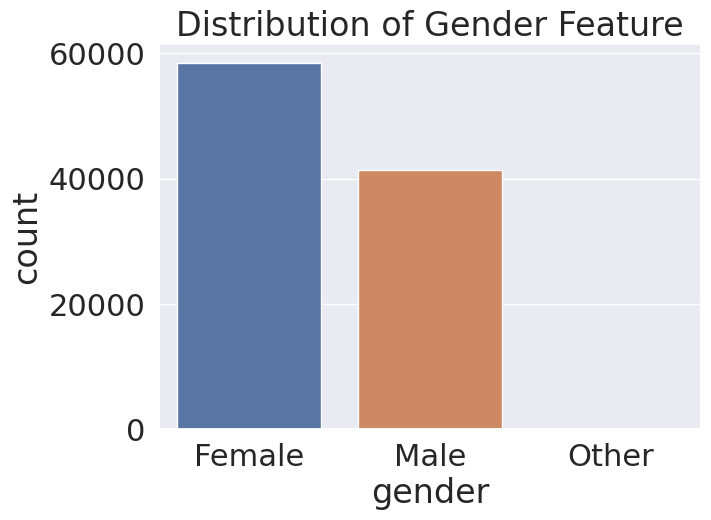

In [123]:
plt.figure(figsize=(7,5))
sns.set(font_scale=2)
sns.countplot(x='gender',data=data);
plt.title("Distribution of Gender Feature");

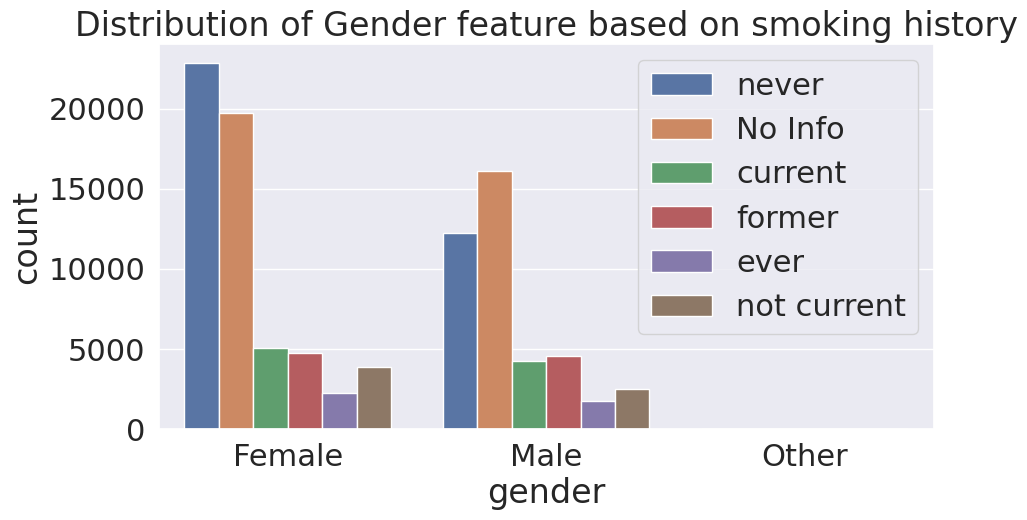

In [124]:
plt.figure(figsize=(10,5));
sns.set(font_scale=2)
sns.countplot(x='gender',data=data,hue='smoking_history');
plt.legend(loc="upper right");
plt.title("Distribution of Gender feature based on smoking history");

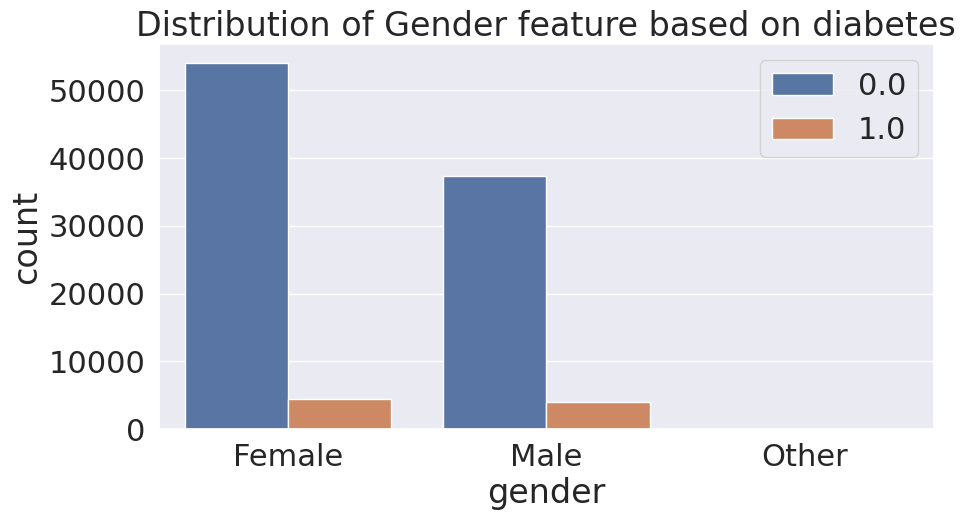

In [125]:
plt.figure(figsize=(10,5));
sns.countplot(x='gender',data=data,hue='diabetes');
plt.legend(loc="upper right");
plt.title("Distribution of Gender feature based on diabetes");

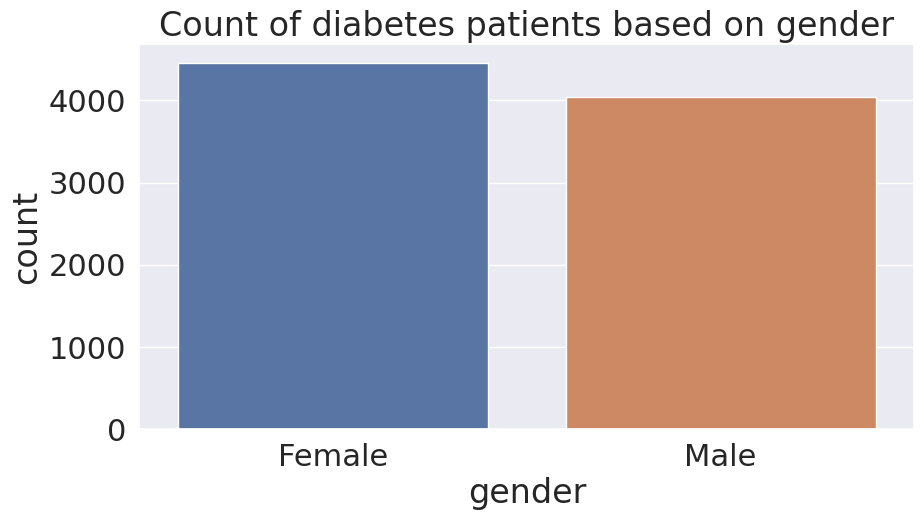

In [126]:
diabetes_data = data[data['diabetes'] == 1]
plt.figure(figsize=(10,5));
sns.countplot(x='gender', data=diabetes_data)
plt.title("Count of diabetes patients based on gender");

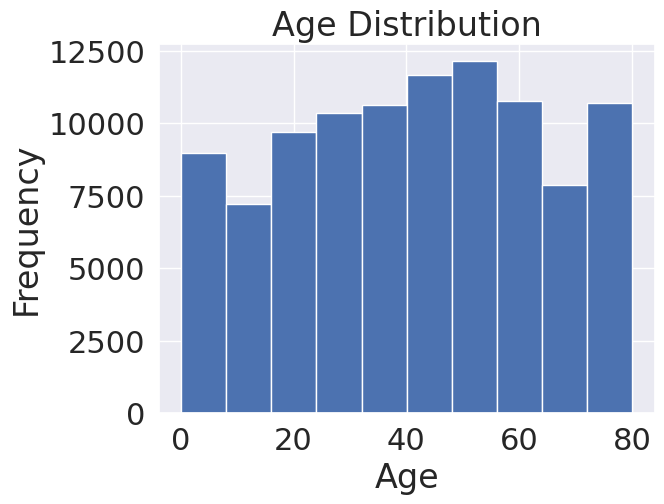

In [127]:
plt.hist(data['age']);

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')


plt.show()

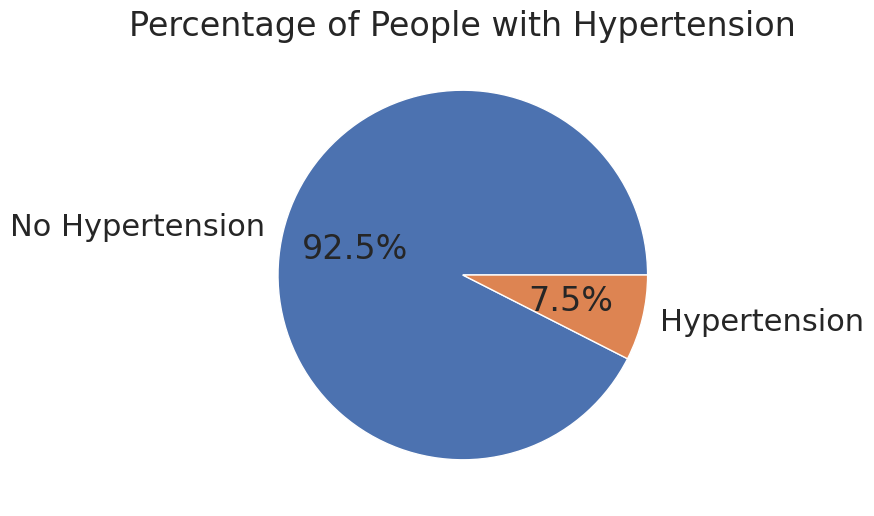

In [128]:

hypertension_counts = data['hypertension'].value_counts()


hypertension_percentage = hypertension_counts / len(data) * 100


plt.figure(figsize=(10,6))
labels = ['No Hypertension', 'Hypertension']
plt.pie(hypertension_percentage, labels=labels, autopct='%1.1f%%')


plt.title('Percentage of People with Hypertension')


plt.show()

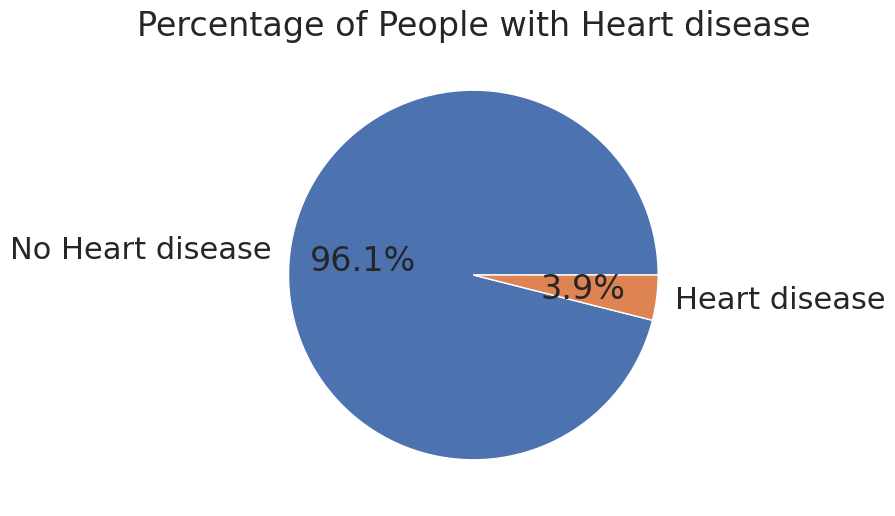

In [129]:
heart_disease_counts = data['heart_disease'].value_counts()


heart_disease_percentage = heart_disease_counts / len(data) * 100


plt.figure(figsize=(10,6))
labels = ['No Heart disease', 'Heart disease']
plt.pie(heart_disease_percentage, labels=labels, autopct='%1.1f%%')

plt.title('Percentage of People with Heart disease')

plt.show()

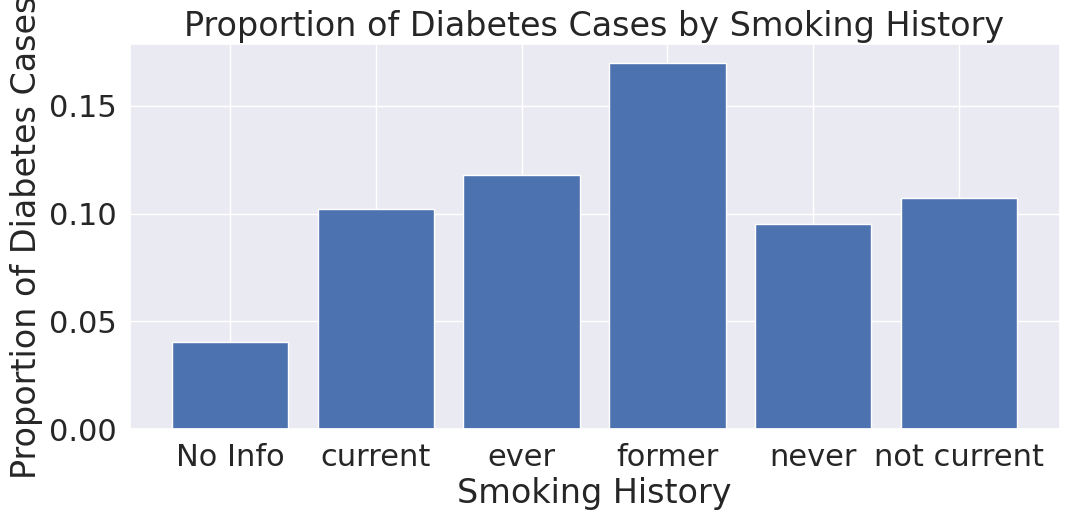

In [130]:
grouped_data = data.groupby('smoking_history')['diabetes'].mean()


plt.figure(figsize=(12,5))
plt.bar(grouped_data.index, grouped_data.values)


plt.title('Proportion of Diabetes Cases by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Proportion of Diabetes Cases')


plt.show()

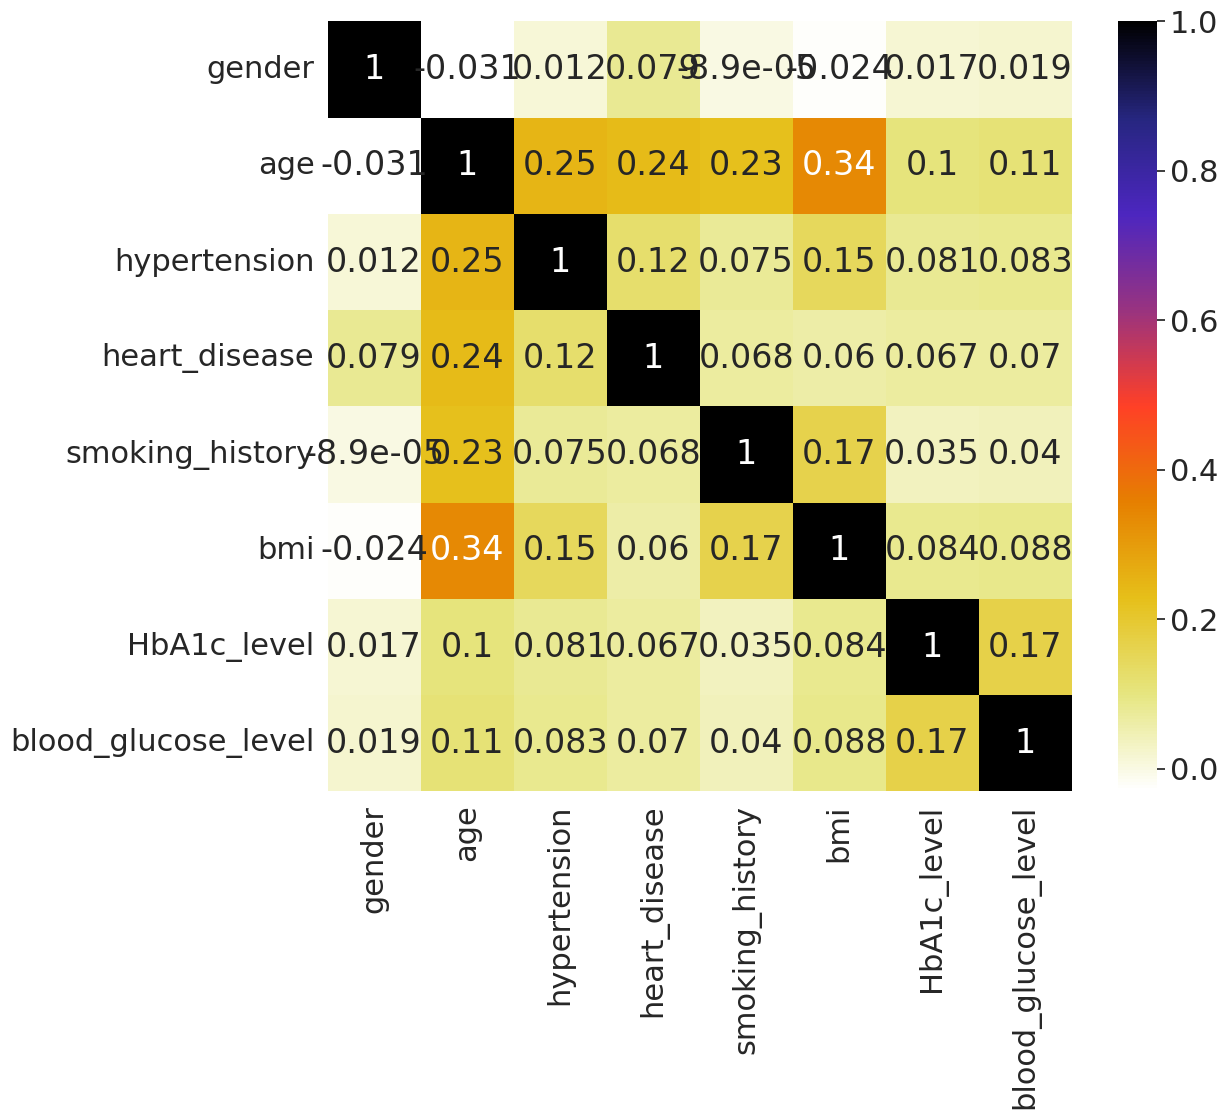

In [131]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r);
plt.show();

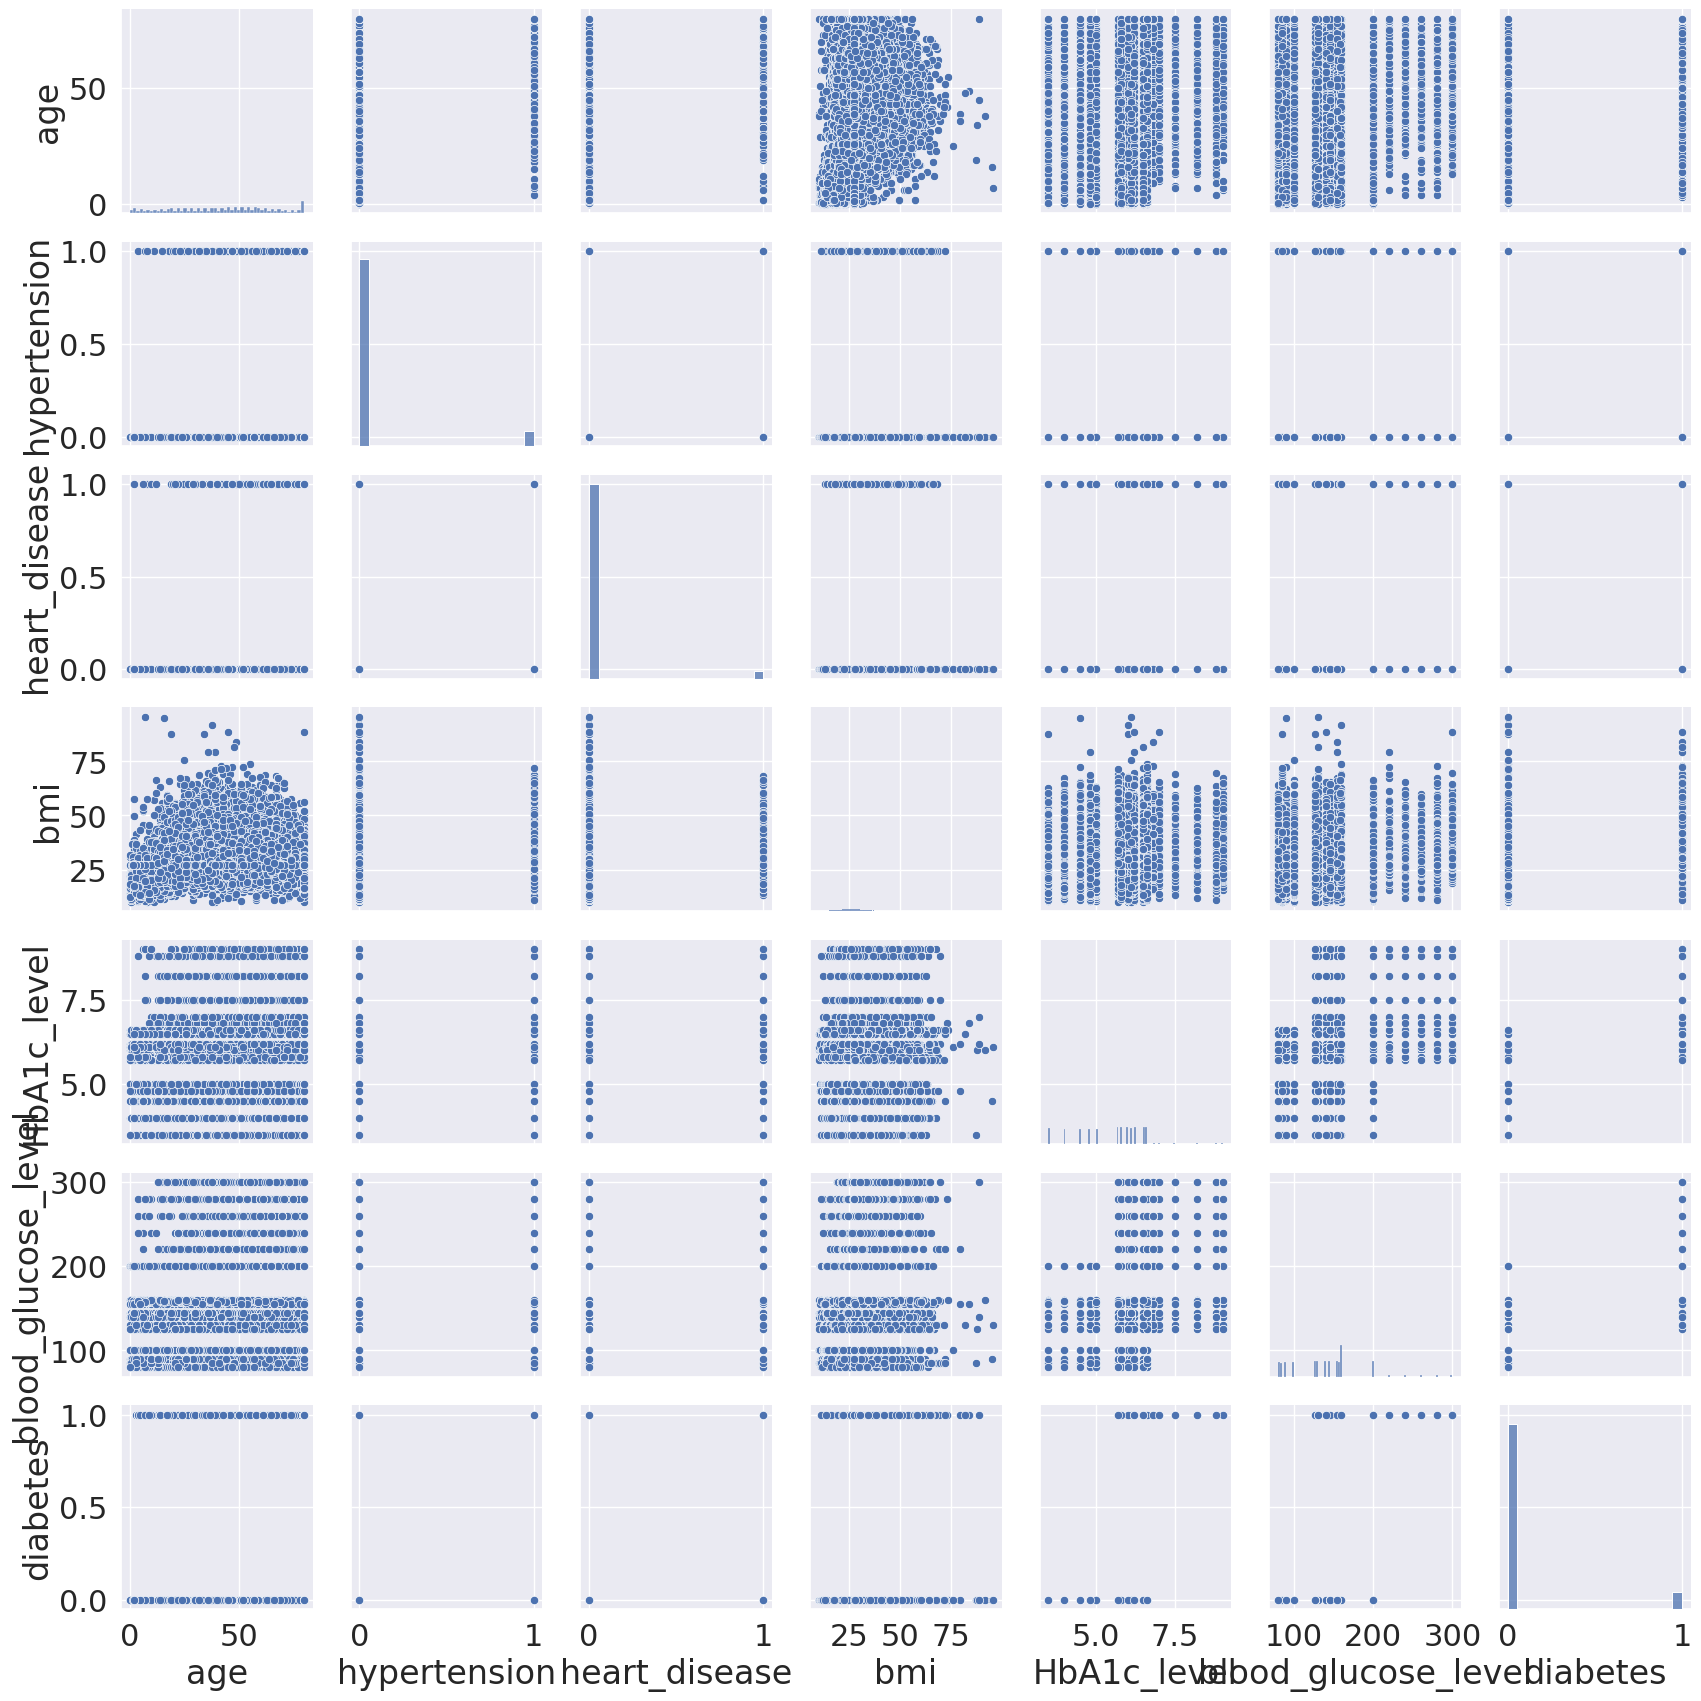

In [132]:
sns.pairplot(data)
plt.show()

# Tworzenie Pipeline
Stwórzmy następujące pipeline:
* dla SVM z jądrem rbf
* dla SVM z jądrem poly
* dla SVM liniowego
* dla regresji logistycznej

W preprocessingu będziemy również używać sklaowania danych, użyjemy *StandardScaler()*

In [101]:
svm_pipeline = Pipeline([('scale', StandardScaler()),
                                 ('classifier', SVC())])

logistic_pipeline = Pipeline([('scale', StandardScaler()),
                                 ('classifier', LogisticRegression())])

random_forest_pipeline = Pipeline([('scale', StandardScaler()),
                                   ('classifier', RandomForestClassifier())])

Po utworzeniu pipeline, możemy się wziąć za tworzenie *GridSearch*

In [134]:
seed=123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

In [133]:
svm_param_grid = {
    'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__kernel': ['rbf', 'poly', 'linear']
}

logistic_param_grid = {
      'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

random_forest_param_grid = {
    'classifier__n_estimators': [1, 2, 4, 8, 16, 32, 64, 96],
    'classifier__max_leaf_nodes': [5, 10, 25, 50, 70, 100]
}

svm_rbf_grid_search = GridSearchCV(svm_pipeline,
                                  param_grid=svm_param_grid,
                                  cv=kfold,
                                  refit=True)

logistic_grid_search = GridSearchCV(logistic_pipeline,
                                  param_grid=logistic_param_grid,
                                  cv=kfold,
                                  refit=True)

random_forest_grid_search = GridSearchCV(random_forest_pipeline,
                                  param_grid=random_forest_param_grid,
                                  cv=kfold,
                                  refit=True)

models = {
    "SVM": svm_rbf_grid_search,
    "Logistic": logistic_grid_search,
    "Random Forest": random_forest_grid_search
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name)
    print(model.best_params_)


KeyboardInterrupt: ignored

# TensorBoard

In [ ]:
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2022_06_22-21_18_24'

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
tensor_model = Sequential()
tensor_model.add(Dense(1024, activation="relu", input_shape=(X_train.shape[1],)))
tensor_model.add(BatchNormalization())
tensor_model.add(Dense(512, activation="relu"))
tensor_model.add(BatchNormalization())
tensor_model.add(Dense(256, activation="relu"))
tensor_model.add(Dense(1, activation="sigmoid"))
tensor_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              13312     
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 1)                 2

In [ ]:
tensor_model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["binary_accuracy"])

In [ ]:
tensorboard_cb = TensorBoard(run_logdir)
early_stopping = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)
history = tensor_model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=25,
    validation_data=(X_test, y_test),
    callbacks=[tensorboard_cb, early_stopping])

models["keras"] = tensor_model

Epoch 1/200
29/29 [==============================] - 1s 15ms/step - loss: 0.7874 - binary_accuracy: 0.6695 - val_loss: 1.9017 - val_binary_accuracy: 0.4576
Epoch 2/200
29/29 [==============================] - 0s 9ms/step - loss: 0.6677 - binary_accuracy: 0.7161 - val_loss: 1.5570 - val_binary_accuracy: 0.5254
Epoch 3/200
29/29 [==============================] - 0s 8ms/step - loss: 0.6306 - binary_accuracy: 0.7133 - val_loss: 0.6706 - val_binary_accuracy: 0.7288
Epoch 4/200
29/29 [==============================] - 0s 9ms/step - loss: 0.6436 - binary_accuracy: 0.6977 - val_loss: 0.8808 - val_binary_accuracy: 0.6328
Epoch 5/200
29/29 [==============================] - 0s 8ms/step - loss: 0.6236 - binary_accuracy: 0.7189 - val_loss: 0.6582 - val_binary_accuracy: 0.6780
Epoch 6/200
29/29 [==============================] - 0s 8ms/step - loss: 0.5812 - binary_accuracy: 0.7331 - val_loss: 1.0873 - val_binary_accuracy: 0.6158
Epoch 7/200
29/29 [==============================] - 0s 8ms/step - lo

To start the TensorBoard server, one option is to open a terminal, if needed activate the virtualenv where you installed TensorBoard, go to this notebook's directory, then type:

```python
$ tensorboard --logdir=./my_logs --port=6006
```

You can then open your web browser to localhost:6006 and use TensorBoard. Once you are done, press Ctrl-C in the terminal window, this will shutdown the TensorBoard server.

Alternatively, you can load TensorBoard's Jupyter extension and run it like this:

```python
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006
```

In [ ]:
columns = ["model", "accuracy", "f1", "recall", "precision"]

data = []
predicted = {}

for name, model in models.items():
    y_test_predicted = model.predict(X_test)
    if name == "keras":
        y_test_predicted = [round(x[0]) for x in y_test_predicted]

    predicted[name] = y_test_predicted

    data.append([name,
                 metrics.accuracy_score(y_true=y_test, y_pred=y_test_predicted),
                 metrics.f1_score(y_true=y_test, y_pred=y_test_predicted),
                 metrics.recall_score(y_true=y_test, y_pred=y_test_predicted),
                 metrics.precision_score(y_true=y_test, y_pred=y_test_predicted)])

results = pd.DataFrame(data, columns=columns)
print(results)

6/6 [==============================] - 0s 2ms/step
           model  accuracy        f1    recall  precision
0            SVM  0.830508  0.858491  0.875000   0.842593
1       Logistic  0.824859  0.851675  0.855769   0.847619
2  Random Forest  0.847458  0.875576  0.913462   0.840708
3          keras  0.819209  0.847619  0.855769   0.839623


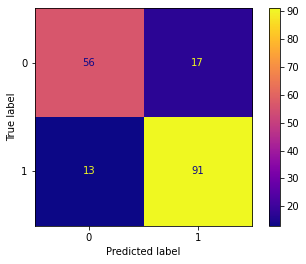

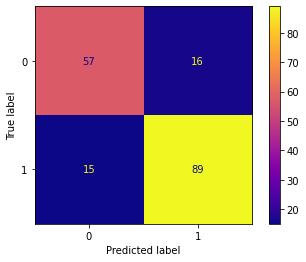

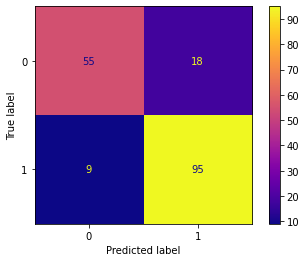

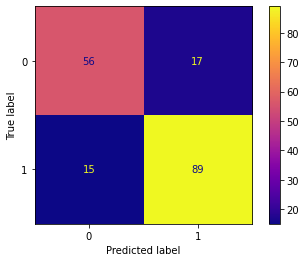

In [ ]:
for name, y_pred in predicted.items():
    ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred, cmap='plasma')

# Podsumowanie

Ze zbioru danych, którego dane były dość mocno zniekształcone, dzięki wizualizacji udało nam się je wyczyścić i doprowadzić do dopuszczalnej formy. Następnie nauczyliśmy kilka najbardziej znanych modeli uczenia maszynowego oraz stworzyliśmy model deep learningowy na podstawie tych danych. Możemy zauważyć, że model oparty o klasyfikator *random forest* sprawdził się najlepiej, następnie dzięki *Confusion Matrix* zaobserwowaliśmy, że model stworzył jedynie *9* najbardziej niebezpiecznych predykcji (naprawdę pacjent był chory, a model przewidział, że nie jest).